In [1]:
import pandas as pd

datos = pd.read_csv('dataframe.csv',sep=',')

In [2]:
datos

,Unnamed: 0,LanguageName,Latitude,Longitude,WordModernName1,Phonetic,SpellingAltv1,source_csv
0,0,Ref. Spelling,-40.00000,-75.50000,ellos,fëjëŋɘn,feyengün,12-feyengün.csv
1,1,Santa Bárbara,-37.67405,-71.80186,ellos,ˌvë.jë.ˈŋɘn,NaN,12-feyengün.csv
2,2,Cañete,-37.96722,-73.39282,ellos,cʰɪ.ˈðwɪ.ŋɘn,NaN,12-feyengün.csv
3,3,Tirúa,-38.36990,-73.49067,ellos,ˈɸë.jë.ɣ̞ɐ̝,NaN,12-feyengün.csv
4,4,Alto Bío Bío,-38.04457,-71.36344,ellos,m̩.ˌvë.jë.ˈŋɘn,NaN,12-feyengün.csv
...,...,...,...,...,...,...,...,...
1336,1336,Huiliches,-39.63992,-71.18686,vino,pʊl.ˈkʊ,NaN,9-pulkü.csv
1337,1337,Jacobacci,-41.28813,-69.55719,vino,ɸʊl.ˈkʰʊ,NaN,9-pulkü.csv
1338,1338,Cushamen,-42.23392,-71.34994,vino,pʰʊl.ˈkʰʊ,NaN,9-pulkü.csv
1339,1339,Futaleufú,-42.95052,-71.18351,vino,ɸʊl.ˈxʊ,NaN,9-pulkü.csv


In [3]:
names = set(datos['LanguageName'])

In [4]:
latitud = dict(zip(datos['LanguageName'],datos['Latitude']))
longitud = dict(zip(datos['LanguageName'],datos['Longitude']))

In [5]:
!pip install haversine

In [6]:
from haversine import haversine

dist_ref = {}

for name in names:
    dist_ref[name]=haversine((latitud['Ref. Spelling'],longitud['Ref. Spelling']),(latitud[name],longitud[name]))

In [7]:
dict(sorted(dist_ref.items(), key=lambda item: item[1]))

{'Ref. Spelling': 0.0,
 'S. Juan de la Costa': 177.2301646411767,
 'San Pablo': 187.52961105844628,
 'Mariquina': 200.66463550716253,
 'Valdivia': 218.12032841870442,
 'Nueva Toltén': 221.15562634114468,
 'Puerto Saavedra': 225.5252027037372,
 'Tirúa': 250.67761263456197,
 'Freire': 250.96348222924908,
 'Lanco': 266.94833257084656,
 'Chol Chol': 272.9018985250136,
 'Dollinco': 273.13440851944256,
 'Villarrica': 279.16837427982796,
 'Cañete': 290.2632931832423,
 'Panguipulli': 292.749353721012,
 'Galvarino': 293.40598618706326,
 'Truf Truf': 297.1690821506928,
 'Lumaco': 302.4937108473996,
 'Vilcún': 315.5253689601365,
 'Cunco': 320.0409799366874,
 'Victoria': 338.71066341320477,
 'Angol': 340.3195155866509,
 'Ercilla': 341.54143070236387,
 'Curarrehue': 342.7200756940107,
 'Junín de los Andes': 359.79125763113615,
 'Huiliches': 370.4940777627709,
 'Aluminé': 391.207483327272,
 'Lonquimay': 396.4700944105974,
 'Icalma': 397.1683552087326,
 'Santa Bárbara': 411.623510725252,
 'Alto Bío B

In [8]:
names

{'Alto Bío Bío',
 'Aluminé',
 'Angol',
 'Cañete',
 'Chalileo',
 'Chol Chol',
 'Cunco',
 'Curarrehue',
 'Cushamen',
 'Dollinco',
 'Ercilla',
 'Freire',
 'Futaleufú',
 'Galvarino',
 'Huiliches',
 'Icalma',
 'Jacobacci',
 'Junín de los Andes',
 'Lago Rosario',
 'Lanco',
 'Lonquimay',
 'Lumaco',
 'Mariquina',
 'Nueva Toltén',
 'Panguipulli',
 'Picunches',
 'Puerto Saavedra',
 'Ref. Spelling',
 'S. Juan de la Costa',
 'San Pablo',
 'Santa Bárbara',
 'Tirúa',
 'Truf Truf',
 'Valdivia',
 'Victoria',
 'Vilcún',
 'Villarrica',
 'Zapala'}

In [9]:
palabras = set(datos['WordModernName1'])

In [10]:
palabras

{'amigo',
 'bajar',
 'boca',
 'bueno',
 'cama',
 'camino',
 'campo',
 'cochayuyo',
 'cola',
 'coser',
 'cuerno',
 'dia',
 'ellos',
 'estrella',
 'fuego',
 'grande',
 'harina_tostada',
 'hoja',
 'lengua',
 'lenya',
 'llorar',
 'luna',
 'mano',
 'matar',
 'negro',
 'noble',
 'nombre',
 'nube',
 'persona_que_ensenya',
 'pie',
 'puerta',
 'rojo',
 'saber',
 'sangre',
 'sol',
 'tengo_hambre',
 'tres',
 'vestido_lana',
 'vino',
 'zorro'}

In [11]:
palabras_elegidas = ['tres'] ## puedes agregar más

In [12]:
dict_datos = {L:{} for L in names}

In [13]:
for L in names:
    for word in palabras_elegidas:
        D = datos[datos['LanguageName']==L]
        try:
            dict_datos[L][word]=list(D[D['WordModernName1']==word]['Phonetic'])[0]
        except IndexError:
            pass#dict_datos[L][word]='unk'

In [14]:
set_palabras = []

for L in names:
    set_palabras+=[list(dict_datos[L].keys())]

In [15]:
set_palabras = list(set.intersection(*map(set,set_palabras)))

In [16]:
set_palabras

['tres']

In [17]:
dict_datos = {name:{word:dict_datos[name][word] for word in set_palabras} for name in names}

In [18]:
dict_datos['San Pablo']

{'tres': 'ˈkʰɘ.lɐ̝'}

In [19]:
dict_datos['S. Juan de la Costa']

{'tres': 'ˈxɘ.lə'}

In [20]:
import itertools
pares_localidades = list(itertools.product(list(dict_datos.keys()), list(dict_datos.keys())))

In [21]:
pares_localidades

[('Lanco', 'Lanco'),
 ('Lanco', 'Cushamen'),
 ('Lanco', 'Futaleufú'),
 ('Lanco', 'Aluminé'),
 ('Lanco', 'Mariquina'),
 ('Lanco', 'Galvarino'),
 ('Lanco', 'Alto Bío Bío'),
 ('Lanco', 'Lago Rosario'),
 ('Lanco', 'Ref. Spelling'),
 ('Lanco', 'Chalileo'),
 ('Lanco', 'Dollinco'),
 ('Lanco', 'Angol'),
 ('Lanco', 'Lonquimay'),
 ('Lanco', 'Santa Bárbara'),
 ('Lanco', 'Picunches'),
 ('Lanco', 'Victoria'),
 ('Lanco', 'Cañete'),
 ('Lanco', 'Vilcún'),
 ('Lanco', 'Panguipulli'),
 ('Lanco', 'Nueva Toltén'),
 ('Lanco', 'Truf Truf'),
 ('Lanco', 'Chol Chol'),
 ('Lanco', 'Jacobacci'),
 ('Lanco', 'Curarrehue'),
 ('Lanco', 'Villarrica'),
 ('Lanco', 'Icalma'),
 ('Lanco', 'Freire'),
 ('Lanco', 'Cunco'),
 ('Lanco', 'Ercilla'),
 ('Lanco', 'S. Juan de la Costa'),
 ('Lanco', 'Huiliches'),
 ('Lanco', 'Tirúa'),
 ('Lanco', 'Zapala'),
 ('Lanco', 'San Pablo'),
 ('Lanco', 'Puerto Saavedra'),
 ('Lanco', 'Lumaco'),
 ('Lanco', 'Valdivia'),
 ('Lanco', 'Junín de los Andes'),
 ('Cushamen', 'Lanco'),
 ('Cushamen', 'Cushamen

In [22]:
## aquí guardas las distancias

distancias = {L:{LL:0 for LL in list(dict_datos.keys())} for L in list(dict_datos.keys())}

In [23]:
!pip install jellyfish

In [24]:
import jellyfish

def funcion_distancia(string1,string2):
    #return 1-jellyfish.jaro_winkler_similarity(string1,string2)
    return jellyfish.levenshtein_distance(string1,string2)/(max(len(string1),len(string2)))

In [25]:
## tienes q recorrer pares_localidades

for par in pares_localidades:
    D = 0
    words1 = dict_datos[par[0]]
    words2 = dict_datos[par[1]]
    words1and2 = list(set(words1) & set(words2))
    for word in words1and2:
        D += funcion_distancia(dict_datos[par[0]][word],dict_datos[par[1]][word])
    distancias[par[0]][par[1]]=D/len(words1and2)

In [26]:
distancias['Ref. Spelling']

{'Lanco': 0.2,
 'Cushamen': 0.375,
 'Futaleufú': 0.2857142857142857,
 'Aluminé': 0.4444444444444444,
 'Mariquina': 0.2857142857142857,
 'Galvarino': 0.375,
 'Alto Bío Bío': 0.2857142857142857,
 'Lago Rosario': 0.375,
 'Ref. Spelling': 0.0,
 'Chalileo': 0.375,
 'Dollinco': 0.375,
 'Angol': 0.375,
 'Lonquimay': 0.5454545454545454,
 'Santa Bárbara': 0.375,
 'Picunches': 0.42857142857142855,
 'Victoria': 0.375,
 'Cañete': 0.375,
 'Vilcún': 0.375,
 'Panguipulli': 0.375,
 'Nueva Toltén': 0.4444444444444444,
 'Truf Truf': 0.5555555555555556,
 'Chol Chol': 0.375,
 'Jacobacci': 0.375,
 'Curarrehue': 0.375,
 'Villarrica': 0.4444444444444444,
 'Icalma': 0.5,
 'Freire': 0.375,
 'Cunco': 0.375,
 'Ercilla': 0.375,
 'S. Juan de la Costa': 0.8333333333333334,
 'Huiliches': 0.6,
 'Tirúa': 0.2857142857142857,
 'Zapala': 0.2857142857142857,
 'San Pablo': 0.375,
 'Puerto Saavedra': 0.375,
 'Lumaco': 0.2857142857142857,
 'Valdivia': 0.375,
 'Junín de los Andes': 0.5}

In [27]:
dict_geo_fon = {}

for localidad in distancias['Ref. Spelling'].keys():
    dict_geo_fon[localidad]=[dist_ref[localidad],distancias['Ref. Spelling'][localidad]]

In [28]:
X = [dict_geo_fon[localidad][0] for localidad in dict_geo_fon.keys()]
Y = [dict_geo_fon[localidad][1] for localidad in dict_geo_fon.keys()]

In [29]:
!pip install adjustText

In [30]:
DF = pd.DataFrame.from_dict(distancias)

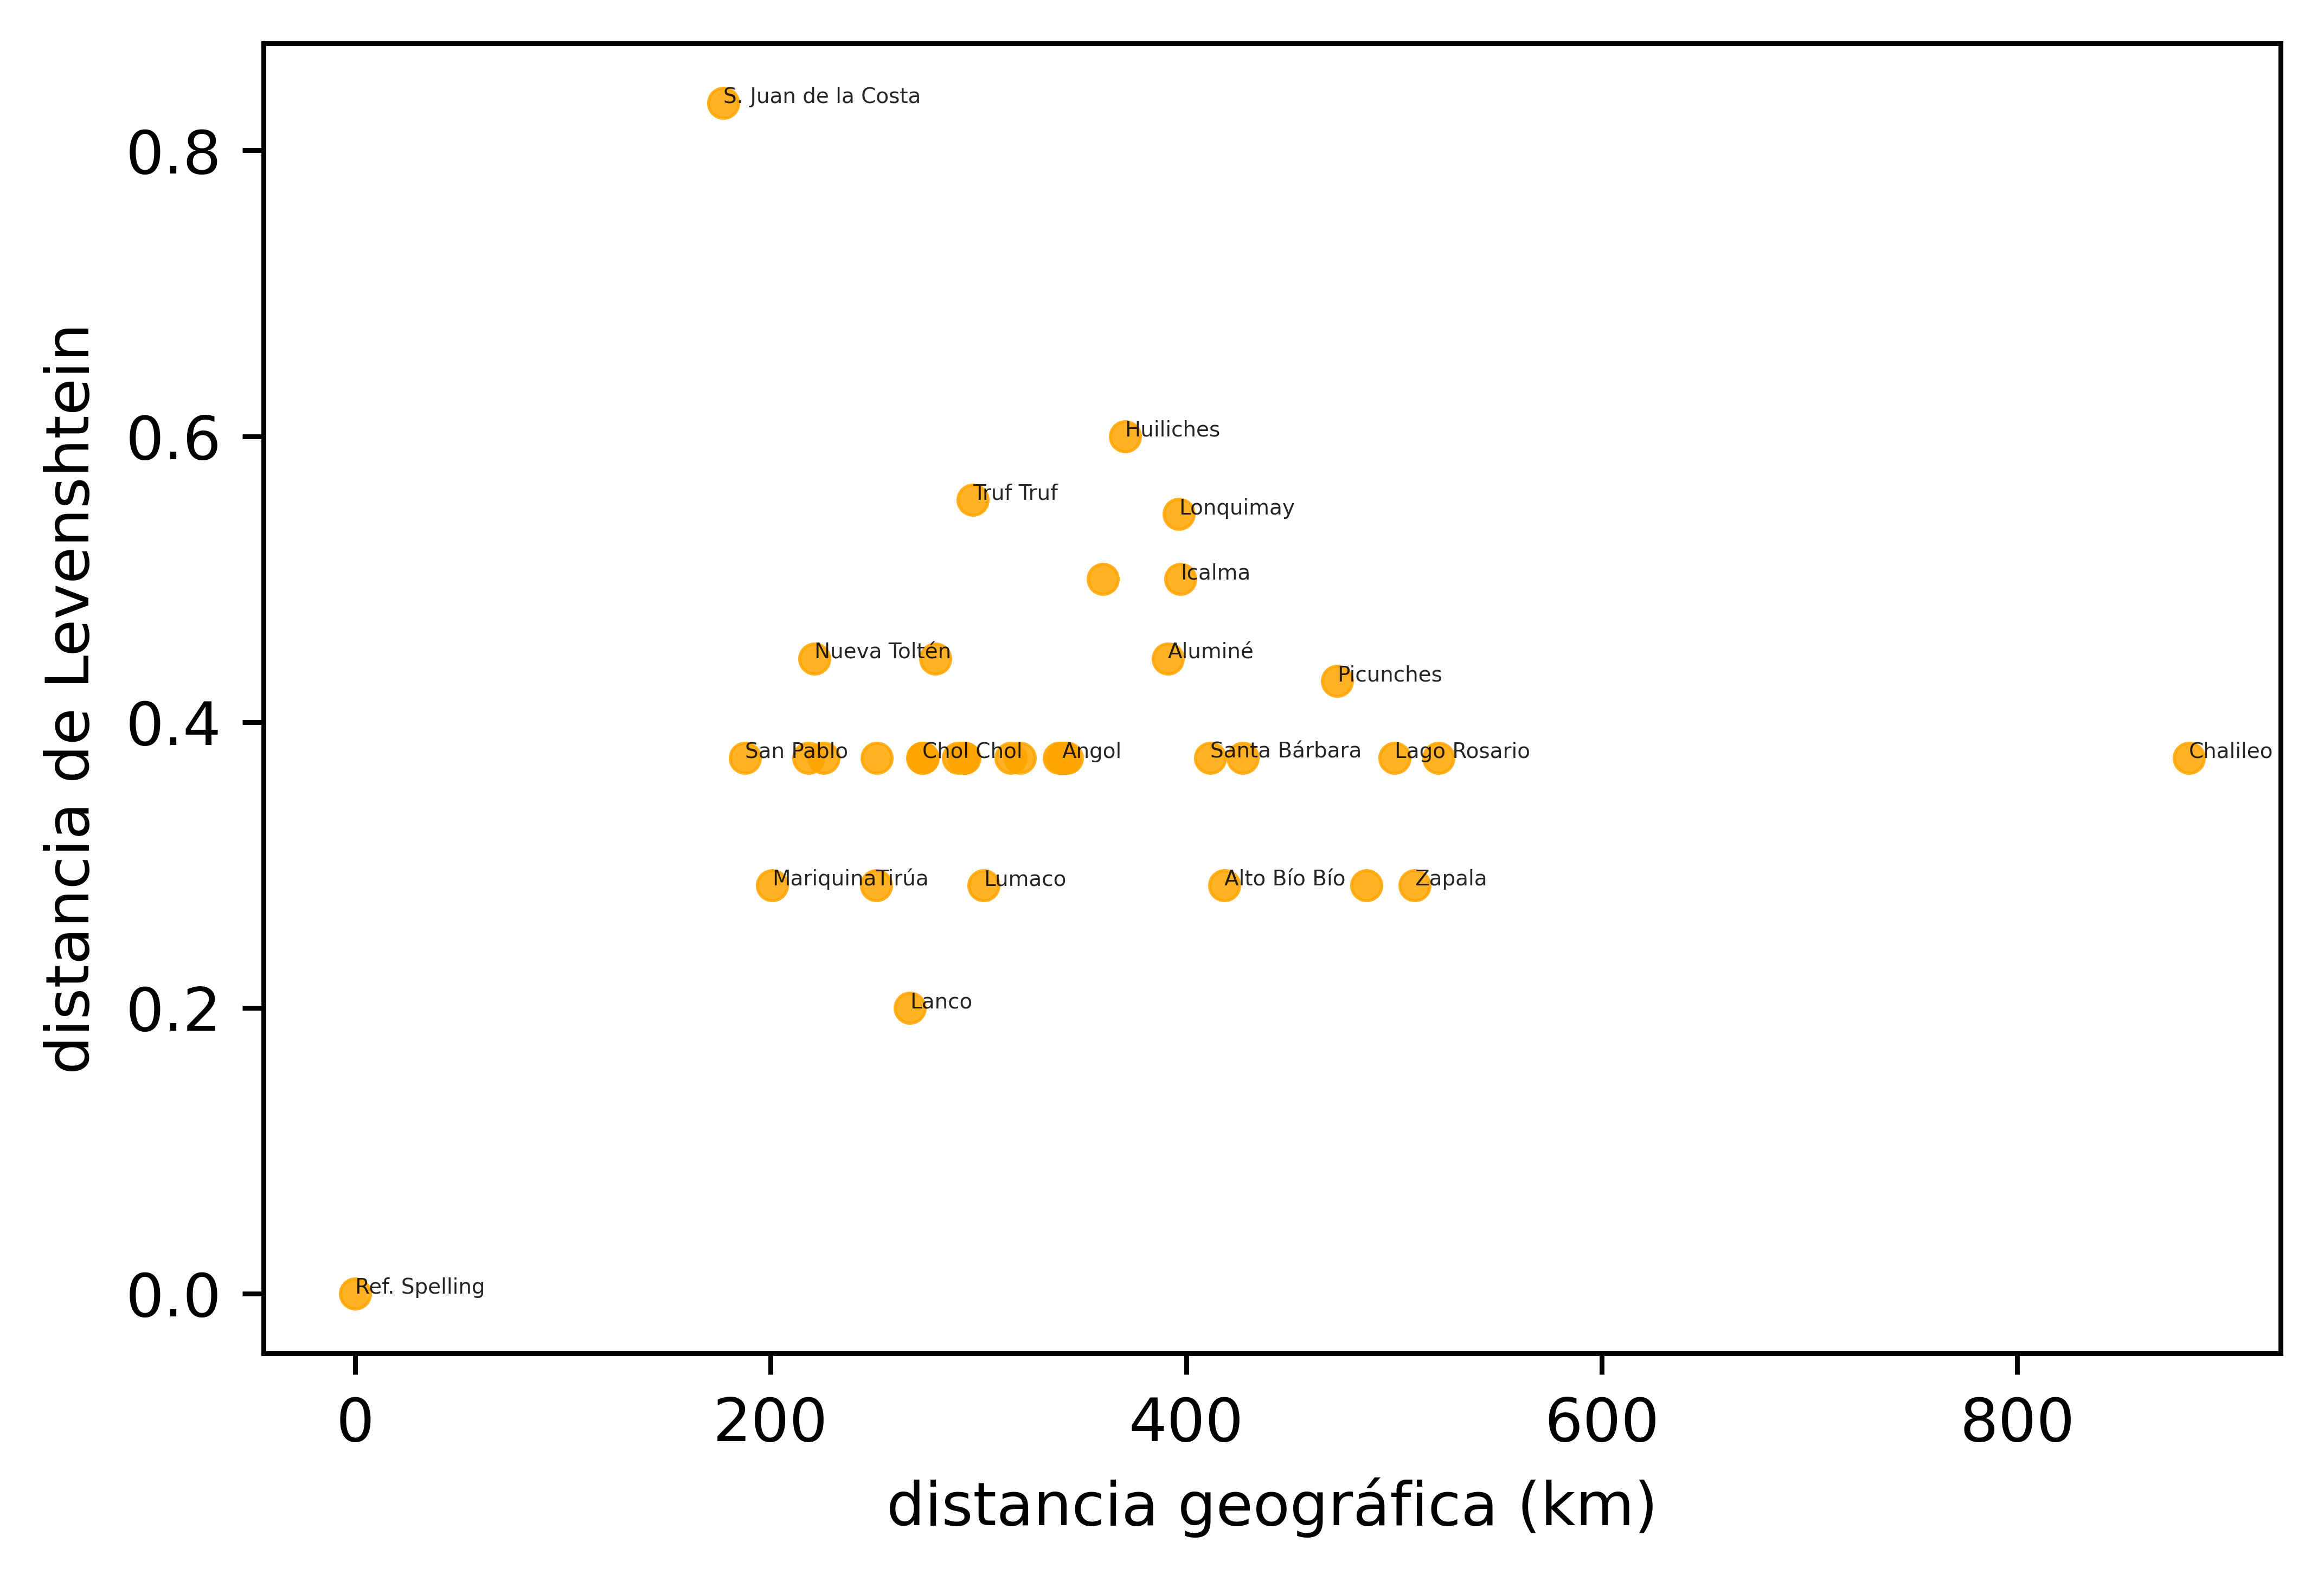

In [31]:
import matplotlib.pyplot as plt
from adjustText import adjust_text

fig, ax = plt.subplots(dpi=800)

for localidad in dict_geo_fon.keys():
    i = list(dict_geo_fon.keys()).index(localidad)
    if localidad in ['Ref. Spelling','Santa Bárbara','Alto Bío Bío','Truf Truf','Icalma','Lonquimay','Lanco','S. Juan de la Costa','Lumaco','Angol','Chol Chol','Nueva Toltén',
 'Mariquina','Lago Rosario','Huiliches','San Pablo','Picunches', 'Aluminé', 'Chalileo', 'Lanco', 'Tirúa', 'Zapala']:
        ax.annotate(localidad, color='k', xy=(X[i],Y[i]), fontsize=3.5, alpha=0.85)

#texts = [plt.text(X[i],Y[i],list(dict_geo_fon.keys())[i]) for i in range(len(list(dict_geo_fon.keys())))]
#adjust_text(texts)

ax.plot(X,Y ,marker='o',color='orange',linewidth=0,markersize=5,markeredgewidth=0.5,markeredgecolor=None,alpha=0.85,fillstyle='full',clip_on=True)

plt.grid(False)
# plt.legend(loc='best',fontsize=7)
plt.ylabel(r'distancia de Levenshtein',fontsize=10)
plt.xlabel(r'distancia geográfica (km)',fontsize=10)
plt.rcParams.update({'font.size': 10})
plt.savefig('geo_Lev_tres.pdf', format='pdf', transparent=True, bbox_inches='tight',dpi=800)
plt.show()

In [32]:
DF = pd.DataFrame.from_dict(distancias)

In [33]:
DF

,Lanco,Cushamen,Futaleufú,Aluminé,Mariquina,Galvarino,Alto Bío Bío,Lago Rosario,Ref. Spelling,Chalileo,...,Ercilla,S. Juan de la Costa,Huiliches,Tirúa,Zapala,San Pablo,Puerto Saavedra,Lumaco,Valdivia,Junín de los Andes
Lanco,0.000000,0.375000,0.428571,0.444444,0.428571,0.375000,0.428571,0.375000,0.200000,0.375000,...,0.375000,1.000000,0.500000,0.428571,0.428571,0.375000,0.375000,0.428571,0.375000,0.500000
Cushamen,0.375000,0.000000,0.125000,0.111111,0.375000,0.250000,0.125000,0.000000,0.375000,0.000000,...,0.000000,0.625000,0.300000,0.375000,0.125000,0.250000,0.250000,0.375000,0.250000,0.250000
Futaleufú,0.428571,0.125000,0.000000,0.222222,0.285714,0.375000,0.000000,0.125000,0.285714,0.125000,...,0.125000,0.714286,0.400000,0.285714,0.000000,0.375000,0.375000,0.285714,0.375000,0.250000
Aluminé,0.444444,0.111111,0.222222,0.000000,0.444444,0.333333,0.222222,0.111111,0.444444,0.111111,...,0.111111,0.666667,0.300000,0.444444,0.222222,0.333333,0.333333,0.444444,0.333333,0.333333
Mariquina,0.428571,0.375000,0.285714,0.444444,0.000000,0.125000,0.285714,0.375000,0.285714,0.375000,...,0.375000,0.428571,0.600000,0.000000,0.285714,0.125000,0.125000,0.000000,0.125000,0.500000
Galvarino,0.375000,0.250000,0.375000,0.333333,0.125000,0.000000,0.375000,0.250000,0.375000,0.250000,...,0.250000,0.500000,0.500000,0.125000,0.375000,0.000000,0.000000,0.125000,0.000000,0.500000
Alto Bío Bío,0.428571,0.125000,0.000000,0.222222,0.285714,0.375000,0.000000,0.125000,0.285714,0.125000,...,0.125000,0.714286,0.400000,0.285714,0.000000,0.375000,0.375000,0.285714,0.375000,0.250000
Lago Rosario,0.375000,0.000000,0.125000,0.111111,0.375000,0.250000,0.125000,0.000000,0.375000,0.000000,...,0.000000,0.625000,0.300000,0.375000,0.125000,0.250000,0.250000,0.375000,0.250000,0.250000
Ref. Spelling,0.200000,0.375000,0.285714,0.444444,0.285714,0.375000,0.285714,0.375000,0.000000,0.375000,...,0.375000,0.833333,0.600000,0.285714,0.285714,0.375000,0.375000,0.285714,0.375000,0.500000
Chalileo,0.375000,0.000000,0.125000,0.111111,0.375000,0.250000,0.125000,0.000000,0.375000,0.000000,...,0.000000,0.625000,0.300000,0.375000,0.125000,0.250000,0.250000,0.375000,0.250000,0.250000


In [34]:
## construyamos un heatmap :) https://seaborn.pydata.org/generated/seaborn.heatmap.html

import seaborn as sns
import scipy.spatial as sp, scipy.cluster.hierarchy as hc
import matplotlib.pyplot as plt
import numpy as np

def mapa_calor(D):
    
    
    linkage = hc.linkage(sp.distance.squareform(DF), method='ward')
        
    plt.figure(figsize=(10,10))
    cg=sns.clustermap(D,cmap='OrRd',row_linkage=linkage, col_linkage=linkage,linewidth=1,yticklabels=True,xticklabels=True,cbar_kws={'shrink': 0.3})
       
    plt.rcParams.update({'font.size': 12})
    plt.savefig('heatmap_tres.pdf', format='pdf', transparent=True, bbox_inches='tight',dpi=800)

<Figure size 720x720 with 0 Axes>

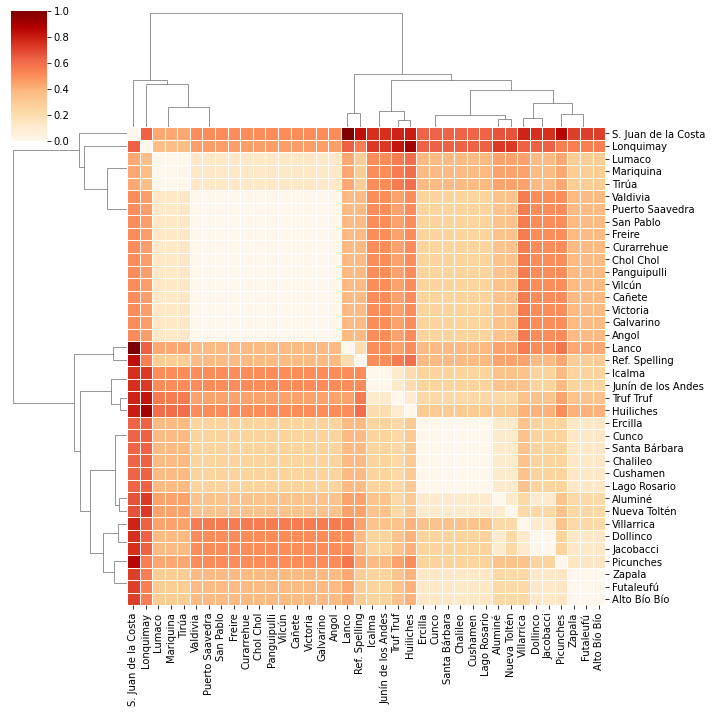

In [35]:
mapa_calor(distancias)